In [1]:
#Plot swarmplots of Rossby Wavenumber Analysis from Model data

##IMPORT PACKAGES
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
import cartopy.feature as cfeature ## for lakes/borders etc
countries_50m = cfeature.NaturalEarthFeature('cultural','admin_0_countries','50m',edgecolor='k',facecolor='none')
import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset  
import xarray as xr
import datetime as dt
import pandas as pd
from matplotlib import gridspec

import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import os
import iris
from iris.experimental.equalise_cubes import equalise_attributes
from iris.util import unify_time_units
import iris.coord_categorisation
import iris.plot as iplt
import iris.quickplot as qplt
import iris.analysis.stats
import pandas as pd
import seaborn as sns
sns.set_style(style='white')
import glob

crs = ccrs.PlateCarree()

import warnings
warnings.filterwarnings("ignore")



#Read in spreadsheets for MaxTemp exceeding fixed 99.5th percentile
#df_PNWE_final = pd.read_excel('df_PNWE_final.xlsx', index_col=0)
#df_SIBE_final = pd.read_excel('df_SIBE_final.xlsx', index_col=0)
df_PNW126_final = pd.read_excel('df_PNW126_final.xlsx', index_col=0)
df_SIB126_final = pd.read_excel('df_SIB126_final.xlsx', index_col=0)
df_PNW245_final = pd.read_excel('df_PNW245_final.xlsx', index_col=0)
df_SIB245_final = pd.read_excel('df_SIB245_final.xlsx', index_col=0)

#join to pattern corr
PNW_126 = pd.read_excel('Spreadsheets/PNW_Corr_ssp126_2021_06_28_v3.xlsx', index_col=0)
PNW_245 = pd.read_excel('Spreadsheets/PNW_Corr_ssp245_2021_06_28_v3.xlsx', index_col=0)  
SIB_126 = pd.read_excel('Spreadsheets/Siberia_Corr_ssp126_2020_06_20_v3.xlsx', index_col=0)  
SIB_245 = pd.read_excel('Spreadsheets/Siberia_Corr_ssp245_2020_06_20_v3.xlsx', index_col=0)  
SIB_126_1988 = pd.read_excel('Spreadsheets/Siberia_Corr_ssp126_1988_07_25_v3.xlsx', index_col=0)  
SIB_245_1988 = pd.read_excel('Spreadsheets/Siberia_Corr_ssp245_1988_07_25_v3.xlsx', index_col=0)  



/apps/developers/compilers/canopy3/2.1.3/1/bit-64/Canopy/edm/envs/User/lib/python3.5/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


In [2]:
#add column for member
df_PNW126_final['member'] = df_PNW126_final['Member'].str[:10]
df_SIB126_final['member'] = df_SIB126_final['Member'].str[:10]
df_SIB245_final['member'] = df_SIB245_final['Member'].str[:10]
df_PNW245_final['member'] = df_PNW245_final['Member'].str[:10]

#add column for dates

df_PNW126_final['dates'] = df_PNW126_final['Date'].dt.strftime('%Y-%m-%d')
df_SIB126_final['dates'] = df_SIB126_final['Date'].dt.strftime('%Y-%m-%d')
df_SIB245_final['dates'] = df_SIB245_final['Date'].dt.strftime('%Y-%m-%d')
df_PNW245_final['dates'] = df_PNW245_final['Date'].dt.strftime('%Y-%m-%d')

In [3]:
#merge!

_PNW126 = pd.merge(PNW_126,df_PNW126_final,right_on=['member','dates'],left_on=['member','dates'], how='left')
_PNW245 = pd.merge(PNW_245,df_PNW245_final,right_on=['member','dates'],left_on=['member','dates'], how='left')
_SIB126 = pd.merge(SIB_126,df_SIB126_final,right_on=['member','dates'],left_on=['member','dates'], how='left')
_SIB245 = pd.merge(SIB_245,df_SIB245_final,right_on=['member','dates'],left_on=['member','dates'], how='left')
_SIB_126_1988 = pd.merge(SIB_126_1988,df_SIB126_final,right_on=['member','dates'],left_on=['member','dates'], how='left')
_SIB_245_1988 = pd.merge(SIB_245_1988,df_SIB245_final,right_on=['member','dates'],left_on=['member','dates'], how='left')

In [4]:
#join to wavenumber?
wavenumber_126 = pd.read_excel("wavenumber_stdv_ssp126.xlsx", index_col=0)
wavenumber_245 =pd.read_excel("wavenumber_stdv_ssp245.xlsx", index_col=0)

#find top 10 to generate plots


In [5]:
#convert to datetime
_PNW126['dates'] = pd.to_datetime(_PNW126['dates'])
_PNW245['dates'] = pd.to_datetime(_PNW245['dates'])
_SIB126['dates'] = pd.to_datetime(_SIB126['dates'])
_SIB245['dates'] = pd.to_datetime(_SIB245['dates'])
_SIB_126_1988['dates'] = pd.to_datetime(_SIB_126_1988['dates'])
_SIB_245_1988['dates'] = pd.to_datetime(_SIB_245_1988['dates'])


#merge!

PNW126 = pd.merge(_PNW126,wavenumber_126,right_on=['member','dates'],left_on=['member','dates'], how='left')
PNW245 = pd.merge(_PNW245,wavenumber_245,right_on=['member','dates'],left_on=['member','dates'], how='left')
SIB126 = pd.merge(_SIB126,wavenumber_126,right_on=['member','dates'],left_on=['member','dates'], how='left')
SIB245 = pd.merge(_SIB245,wavenumber_245,right_on=['member','dates'],left_on=['member','dates'], how='left')
SIB126_1988 = pd.merge(_SIB_126_1988,wavenumber_126,right_on=['member','dates'],left_on=['member','dates'], how='left')
SIB245_1988 = pd.merge(_SIB_245_1988 ,wavenumber_245,right_on=['member','dates'],left_on=['member','dates'], how='left')

In [6]:
#sort by descending MaxTemp and save to excel
PNW126_all = PNW126.sort_values(by='Max_Temp', ascending=False)
#PNW126_all.to_excel('PNW126_all.xlsx')

PNW245_all = PNW245.sort_values(by='Max_Temp', ascending=False)
#PNW245_all.to_excel('PNW245_all.xlsx')

SIB126_all = SIB126.sort_values(by='Max_Temp', ascending=False)
#SIB126_all.to_excel('SIB126_all.xlsx')

SIB245_all = SIB245.sort_values(by='Max_Temp', ascending=False)
#SIB245_all.to_excel('SIB245_all.xlsx')

SIB126_1988_all = SIB126_1988.sort_values(by='Max_Temp', ascending=False)
#SIB126_1988_all.to_excel('SIB126_1988_all.xlsx')

SIB245_1988_all = SIB245_1988.sort_values(by='Max_Temp', ascending=False)
#SIB245_1988_all.to_excel('SIB245_1988_all.xlsx')

In [7]:
#reorganise for plotting


PNW245_melt = pd.melt(PNW245_all[['wave-1', 'wave-2','wave-3', 'wave-4','wave-5', 'wave-6','wave-7', 'wave-8','wave-9', 'wave-10']],var_name='Wavenumber', value_name='Amplitude')
#PNW245_melt = PNW245_melt[PNW245_melt['Amplitude']>1.5]


PNW126_melt = pd.melt(PNW126_all[['wave-1', 'wave-2','wave-3', 'wave-4','wave-5', 'wave-6','wave-7', 'wave-8','wave-9', 'wave-10']],var_name='Wavenumber', value_name='Amplitude')
#PNW126_melt = PNW126_melt[PNW126_melt['Amplitude']>1.5]



SIB126_melt = pd.melt(SIB126_all[['wave-1', 'wave-2','wave-3', 'wave-4','wave-5', 'wave-6','wave-7', 'wave-8','wave-9', 'wave-10']],var_name='Wavenumber', value_name='Amplitude')
#SIB126_melt = SIB126_melt[SIB126_melt['Amplitude']>1.5]


SIB245_melt = pd.melt(SIB245_all[['wave-1', 'wave-2','wave-3', 'wave-4','wave-5', 'wave-6','wave-7', 'wave-8','wave-9', 'wave-10']],var_name='Wavenumber', value_name='Amplitude')
#SIB245_melt = SIB245_melt[SIB245_melt['Amplitude']>1.5]



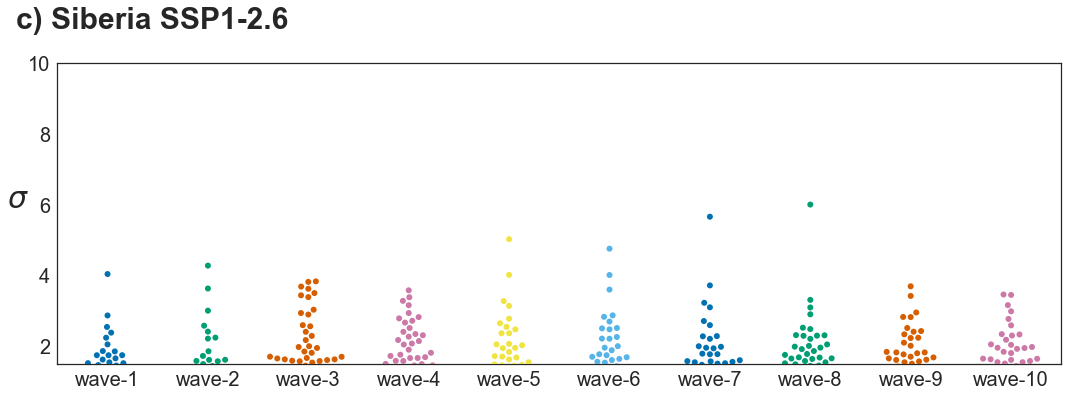

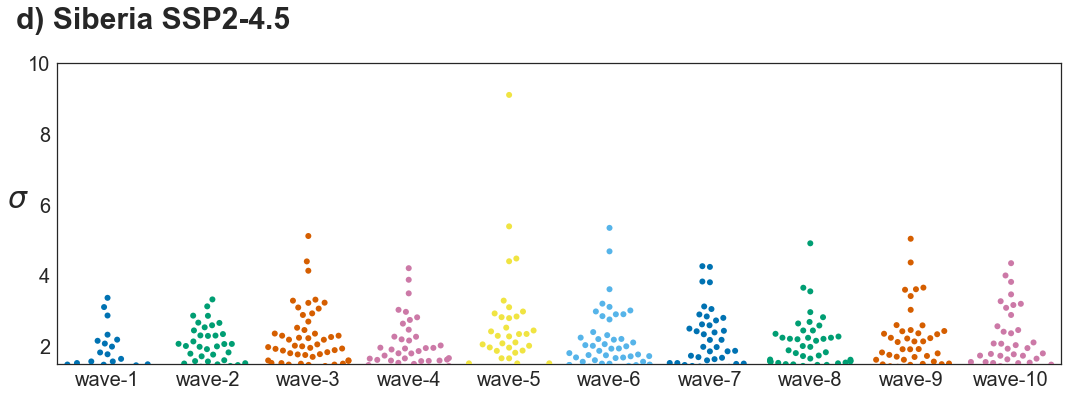

In [8]:
#plot


c='white'

#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig1 = plt.figure(figsize=(15,5))
#gs = gridspec.GridSpec(1,20)

ax3 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(gs[:,3:6])
#ax3 = fig1.add_subplot(gs[:,3:20])
#ax5 = fig1.add_subplot(1,5,5)

#ax3.yaxis.set_visible(False)
#ax5.yaxis.set_viSIB88le(False)


#sns.boxplot(x="variable", y="value", data=pd.melt(PNW245_all),ax=ax3,linewidth=0,  palette="Reds")

sns.swarmplot(y=SIB126_melt["Amplitude"],x=SIB126_melt["Wavenumber"],ax=ax3, split=True,linewidth=0, size=6,palette="colorblind")
#sns.swarmplot(x="variable", y="value", data=pd.melt(df),ax=ax3,linewidth=0,  split=True, size=5, palette="Reds")
ax3.set(ylim=(1.5,10))
ax3.set(ylabel='')
ax3.set(xlabel='')
plt.legend(title='', loc='best', bbox_to_anchor=(0.14, 1.22))
#plt.setp(ax3.get_legend().get_title(), fontsize='20')
#plt.setp(ax3.get_legend().get_texts(), fontsize='20')
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.set_ylabel(r'$\sigma$', fontsize=30, rotation=0, labelpad= 10)
#ax3.set_xlabel('Modelled\nSSP1-2.6',fontsize=15)
#ax3.set_title('2015-2100', size=15, fontweight = 'light')
ax3.grid(False)


plt.suptitle('c) Siberia SSP1-2.6', y=1.1,x=0.02,fontsize=30,horizontalalignment='left',fontweight = 'bold')
plt.tight_layout()
plt.savefig('SIB126_wavenumber.png',format ='png', dpi=150, bbox_inches='tight')
plt.show()

#plot


c='white'

#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig1 = plt.figure(figsize=(15,5))
#gs = gridspec.GridSpec(1,20)

ax3 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(gs[:,3:6])
#ax3 = fig1.add_subplot(gs[:,3:20])
#ax5 = fig1.add_subplot(1,5,5)

#ax3.yaxis.set_visible(False)
#ax5.yaxis.set_viSIB88le(False)


#sns.boxplot(x="variable", y="value", data=pd.melt(PNW245_all),ax=ax3,linewidth=0,  palette="Reds")

sns.swarmplot(y=SIB245_melt["Amplitude"],x=SIB245_melt["Wavenumber"],ax=ax3, split=True,linewidth=0, size=6,palette="colorblind")
#sns.swarmplot(x="variable", y="value", data=pd.melt(df),ax=ax3,linewidth=0,  split=True, size=5, palette="Reds")
ax3.set(ylim=(1.5,10))
ax3.set(ylabel='')
ax3.set(xlabel='')
plt.legend(title='', loc='best', bbox_to_anchor=(0.14, 1.22))
#plt.setp(ax3.get_legend().get_title(), fontsize='20')
#plt.setp(ax3.get_legend().get_texts(), fontsize='20')
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.set_ylabel(r'$\sigma$', fontsize=30, rotation=0, labelpad= 10)
#ax3.set_xlabel('Modelled\nSSP1-2.6',fontsize=15)
#ax3.set_title('2015-2100', size=15, fontweight = 'light')
ax3.grid(False)


plt.suptitle('d) Siberia SSP2-4.5', y=1.1,x=0.02,fontsize=30,horizontalalignment='left',fontweight = 'bold')
plt.tight_layout()
plt.savefig('SIB245_wavenumber.png',format ='png', dpi=150, bbox_inches='tight')
plt.show()

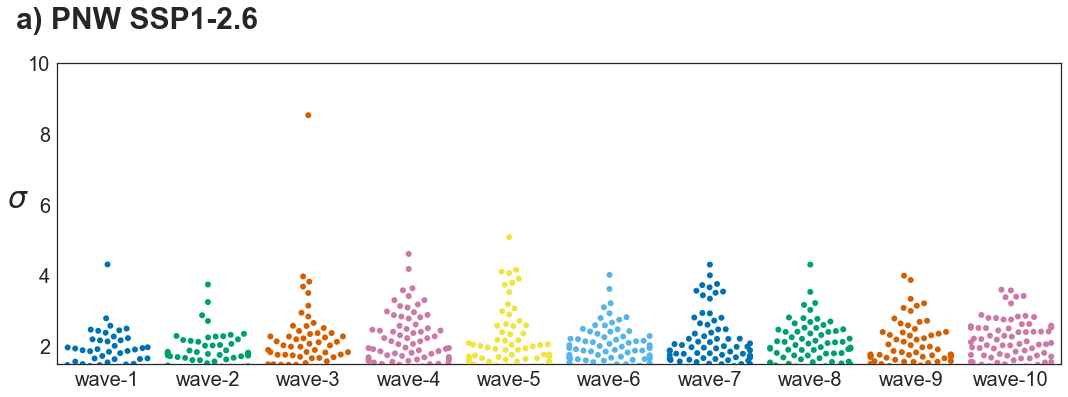

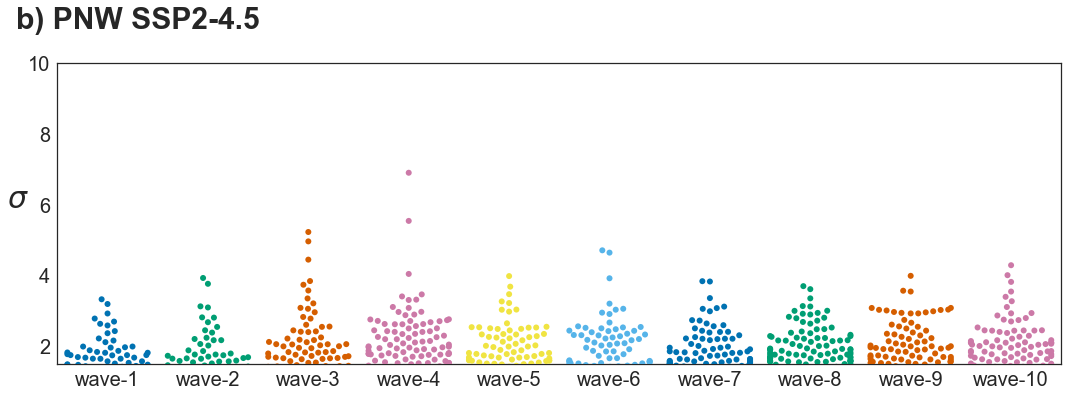

In [9]:

#plot


c='white'

#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig1 = plt.figure(figsize=(15,5))
#gs = gridspec.GridSpec(1,20)

ax3 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(gs[:,3:6])
#ax3 = fig1.add_subplot(gs[:,3:20])
#ax5 = fig1.add_subplot(1,5,5)

#ax3.yaxis.set_viPNWle(False)
#ax5.yaxis.set_viPNW88le(False)


#sns.boxplot(x="variable", y="value", data=pd.melt(PNW245_all),ax=ax3,linewidth=0,  palette="Reds")

sns.swarmplot(y=PNW126_melt["Amplitude"],x=PNW126_melt["Wavenumber"],ax=ax3, split=True,linewidth=0, size=6,palette="colorblind")
#sns.swarmplot(x="variable", y="value", data=pd.melt(df),ax=ax3,linewidth=0,  split=True, size=5, palette="Reds")
ax3.set(ylim=(1.5,10))
ax3.set(ylabel='')
ax3.set(xlabel='')
plt.legend(title='', loc='best', bbox_to_anchor=(0.14, 1.22))
#plt.setp(ax3.get_legend().get_title(), fontsize='20')
#plt.setp(ax3.get_legend().get_texts(), fontsize='20')
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.set_ylabel(r'$\sigma$', fontsize=30, rotation=0, labelpad= 10)
#ax3.set_xlabel('Modelled\nSSP1-2.6',fontsize=15)
#ax3.set_title('2015-2100', size=15, fontweight = 'light')
ax3.grid(False)


plt.suptitle('a) PNW SSP1-2.6', y=1.1,x=0.02,fontsize=30,horizontalalignment='left',fontweight = 'bold')
plt.tight_layout()
plt.savefig('PNW126_wavenumber.png',format ='png', dpi=150, bbox_inches='tight')
plt.show()

#plot


c='white'

#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

fig1 = plt.figure(figsize=(15,5))
#gs = gridspec.GridSpec(1,20)

ax3 = fig1.add_subplot(1,1,1)
#ax2 = fig1.add_subplot(gs[:,3:6])
#ax3 = fig1.add_subplot(gs[:,3:20])
#ax5 = fig1.add_subplot(1,5,5)

#ax3.yaxis.set_viPNWle(False)
#ax5.yaxis.set_viPNW88le(False)


#sns.boxplot(x="variable", y="value", data=pd.melt(PNW245_all),ax=ax3,linewidth=0,  palette="Reds")

sns.swarmplot(y=PNW245_melt["Amplitude"],x=PNW245_melt["Wavenumber"],ax=ax3, split=True,linewidth=0, size=6,palette="colorblind")
#sns.swarmplot(x="variable", y="value", data=pd.melt(df),ax=ax3,linewidth=0,  split=True, size=5, palette="Reds")
ax3.set(ylim=(1.5,10))
ax3.set(ylabel='')
ax3.set(xlabel='')
plt.legend(title='', loc='best', bbox_to_anchor=(0.14, 1.22))
#plt.setp(ax3.get_legend().get_title(), fontsize='20')
#plt.setp(ax3.get_legend().get_texts(), fontsize='20')
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.set_ylabel(r'$\sigma$', fontsize=30, rotation=0, labelpad= 10)
#ax3.set_xlabel('Modelled\nSSP1-2.6',fontsize=15)
#ax3.set_title('2015-2100', size=15, fontweight = 'light')
ax3.grid(False)


plt.suptitle('b) PNW SSP2-4.5', y=1.1,x=0.02,fontsize=30,horizontalalignment='left',fontweight = 'bold')
plt.tight_layout()
plt.savefig('PNW245_wavenumber.png',format ='png', dpi=150, bbox_inches='tight')
plt.show()


In [42]:
mean_PNW245 = PNW245_melt.groupby('Wavenumber').mean()
mean_PNW245


,Amplitude
Wavenumber,
wave-1,-0.149638
wave-10,0.048150
wave-2,-0.164439
wave-3,0.037519
wave-4,0.036568
wave-5,0.002260
wave-6,-0.045156
wave-7,-0.005701
wave-8,0.041124


In [43]:
mean_PNW126 = PNW126_melt.groupby('Wavenumber').mean()
mean_PNW126

,Amplitude
Wavenumber,
wave-1,-0.083030
wave-10,0.063454
wave-2,-0.152313
wave-3,-0.009308
wave-4,0.076323
wave-5,0.033677
wave-6,0.057804
wave-7,0.060010
wave-8,0.099421


In [44]:
mean_SIB245 = SIB245_melt.groupby('Wavenumber').mean()
mean_SIB245


,Amplitude
Wavenumber,
wave-1,-0.289528
wave-10,-0.067220
wave-2,-0.052811
wave-3,0.028930
wave-4,-0.071684
wave-5,-0.055276
wave-6,-0.042964
wave-7,-0.063581
wave-8,-0.063561


In [45]:
mean_SIB126 = SIB126_melt.groupby('Wavenumber').mean()
mean_SIB126

,Amplitude
Wavenumber,
wave-1,-0.085908
wave-10,-0.065751
wave-2,-0.082222
wave-3,0.170796
wave-4,0.021260
wave-5,-0.027957
wave-6,0.016983
wave-7,-0.017042
wave-8,-0.006889
